In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# 2022-06-02_bfm_1-2 (Flood Basalt) (Liu)

In [2]:
def data_cats(directory):
    os.chdir(directory)
    f_list = glob('*.csv')
    f_list = [i.rstrip('.csv') for i in f_list]
    f_list = [i.rstrip('0123456789') for i in f_list]
    f_set = set(f_list)
    output_total = len(f_list) / len(f_set)
    return f_set, int(output_total)

In [3]:
def time_finder(in_file_path):
    with open(in_file_path) as f:
        t = f.read().strip()
    m = re.findall(r"^spatial_profile.+?$", t, re.MULTILINE)
    m = m[0]
    m = m.split()
    m = m[1:]
    m.append("1E-12")
    m_float = [float(x) for x in m]
    return m_float

In [4]:
# Iterate through all the files in order, generating dataframes that need compiling.
def csv_dfer(directory, in_file_path):
    catList, max_time = data_cats(directory)
    times = time_finder(in_file_path)
    metric_final_dataframes = []
    for _ in catList:
        metric_dataframes = []
        for __,___ in zip(range(max_time), times):
            df = pd.read_csv(directory + "/" + str(_) + str(__+1) + ".csv")
            df["timestep"] = str(___)
            metric_dataframes.append(df)
        df = pd.concat(metric_dataframes)
        df["metric"] = str(_)
        metric_final_dataframes.append(df)
    final_df = pd.concat(metric_final_dataframes)
    return final_df

In [5]:
infile_path_FB = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/crunchflow_work/bfm/2022-06-05_bfm_1-2_1D-LS_FB/basalt.in"

directory_path_FB = (infile_path_FB.replace('/basalt.in','')) + "/tec2csv"

df_FB = csv_dfer(directory_path_FB, infile_path_FB)

In [6]:
df_FB

,X,Y,Z,Diopside,Diopside_a,Hedenbergite,Hedenbergite_a,Albite,Albite_a,Anorthite,...,CaOH+,FeCl+,FeOH+,HSiO3-,KCl(aq),KOH(aq),MgCl+,NaCl(aq),NaHSiO3(aq),NaOH(aq)
0,0.125,5.52,0.07,0.041999,0.0,0.023999,0.0,0.039,0.0,0.057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.375,5.52,0.07,0.041999,0.0,0.024000,0.0,0.039,0.0,0.057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.625,5.52,0.07,0.041999,0.0,0.024000,0.0,0.039,0.0,0.057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.875,5.52,0.07,0.042000,0.0,0.024000,0.0,0.039,0.0,0.057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.125,5.52,0.07,0.042000,0.0,0.024000,0.0,0.039,0.0,0.057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,36.875,5.52,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.512548,-13.664109,-7.479505,-8.004557,-16.986664,-13.710692,-18.400634,-13.719207,-10.035384,-11.733107
148,37.125,5.52,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.512688,-13.664113,-7.479507,-8.004514,-16.986847,-13.710873,-18.400379,-13.719168,-10.035302,-11.733066
149,37.375,5.52,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.512793,-13.664117,-7.479508,-8.004483,-16.986984,-13.711008,-18.400188,-13.719138,-10.035241,-11.733034
150,37.625,5.52,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.512863,-13.664119,-7.479509,-8.004462,-16.987075,-13.711099,-18.400061,-13.719118,-10.035200,-11.733014


In [7]:
df_FB = df_FB.replace(to_replace=r'^\d+\.\d+-\d+$', value='0', regex=True)

# 1.0 - Dodd Model Data

In [8]:
df = df_FB.filter(["X", "timestep", "metric", "Siderite"])
df = df.dropna(axis=0)
df = df[df["metric"] == "volume"]

In [9]:
def df_interpreter(df, week):
    df = df[df["timestep"] == week]
    x = (df.X).astype(float)
    y = df["Siderite"].astype(float)
    return x, y

In [10]:
x_fb_dodd_6week_DistMm, y_fb_dodd_6week_VolFracDecPct = df_interpreter(df, "42.0")
x_fb_dodd_12week_DistMm, y_fb_dodd_12week_VolFracDecPct = df_interpreter(df, "84.0")
x_fb_dodd_20week_DistMm, y_fb_dodd_20week_VolFracDecPct = df_interpreter(df, "140.0")
x_fb_dodd_30week_DistMm, y_fb_dodd_30week_VolFracDecPct = df_interpreter(df, "210.0")
x_fb_dodd_40week_DistMm, y_fb_dodd_40week_VolFracDecPct = df_interpreter(df, "280.0")

In [11]:
y_fb_dodd_6week_VolFracPct = y_fb_dodd_6week_VolFracDecPct * 100
y_fb_dodd_12week_VolFracPct = y_fb_dodd_12week_VolFracDecPct * 100
y_fb_dodd_20week_VolFracPct = y_fb_dodd_20week_VolFracDecPct * 100
y_fb_dodd_30week_VolFracPct = y_fb_dodd_30week_VolFracDecPct * 100
y_fb_dodd_40week_VolFracPct = y_fb_dodd_40week_VolFracDecPct * 100

In [12]:
def NormalizeData(data, lower, upper):
    return (data - lower) / (upper - lower)

In [13]:
max_vals = []
list_of_Xs = [y_fb_dodd_6week_VolFracPct, y_fb_dodd_12week_VolFracPct, y_fb_dodd_20week_VolFracPct, y_fb_dodd_30week_VolFracPct, y_fb_dodd_40week_VolFracPct]
for _ in list_of_Xs:
    max_vals.append(max(_))
max_value = max(max_vals)

In [14]:
y_lower = 0
y_higher = max_value

y_fb_dodd_6week_VolFracPct_norm = NormalizeData(np.array(y_fb_dodd_6week_VolFracPct), y_lower, y_higher)
y_fb_dodd_12week_VolFracPct_norm = NormalizeData(np.array(y_fb_dodd_12week_VolFracPct), y_lower, y_higher)
y_fb_dodd_20week_VolFracPct_norm = NormalizeData(np.array(y_fb_dodd_20week_VolFracPct), y_lower, y_higher)
y_fb_dodd_30week_VolFracPct_norm = NormalizeData(np.array(y_fb_dodd_30week_VolFracPct), y_lower, y_higher)
y_fb_dodd_40week_VolFracPct_norm = NormalizeData(np.array(y_fb_dodd_40week_VolFracPct), y_lower, y_higher)

# 1.1 - Xiong Model Data - Siderite

In [15]:
fb_xiong_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/crunchflow_work/Xiong_data/FB_modelled.csv"
fb_xiong_df = pd.read_csv(fb_xiong_path)

In [16]:
def df_interpreter(df, week):
    df = df[df["Week"] == week]
    x = (df.Distance).astype(float)
    y = df["Volume_Fraction"].astype(float)
    return x, y

In [17]:
x_fb_xiong_6week_DistMm, y_fb_xiong_6week_VolFracPct = df_interpreter(fb_xiong_df, "6week")
x_fb_xiong_12week_DistMm, y_fb_xiong_12week_VolFracPct = df_interpreter(fb_xiong_df, "12week")
x_fb_xiong_20week_DistMm, y_fb_xiong_20week_VolFracPct = df_interpreter(fb_xiong_df, "20week")
x_fb_xiong_30week_DistMm, y_fb_xiong_30week_VolFracPct = df_interpreter(fb_xiong_df, "30week")
x_fb_xiong_40week_DistMm, y_fb_xiong_40week_VolFracPct = df_interpreter(fb_xiong_df, "40week")

In [18]:
def NormalizeData(data, lower, upper):
    return (data - lower) / (upper - lower)

In [19]:
max_vals = []
list_of_Xs = [y_fb_xiong_6week_VolFracPct, y_fb_xiong_12week_VolFracPct, y_fb_xiong_20week_VolFracPct, y_fb_xiong_30week_VolFracPct, y_fb_xiong_40week_VolFracPct]
for _ in list_of_Xs:
    max_vals.append(max(_))
max_value = max(max_vals)

In [20]:
y_lower = 0
y_higher = max_value

y_fb_xiong_6week_VolFracPct_norm = NormalizeData(np.array(y_fb_xiong_6week_VolFracPct), y_lower, y_higher)
y_fb_xiong_12week_VolFracPct_norm = NormalizeData(np.array(y_fb_xiong_12week_VolFracPct), y_lower, y_higher)
y_fb_xiong_20week_VolFracPct_norm = NormalizeData(np.array(y_fb_xiong_20week_VolFracPct), y_lower, y_higher)
y_fb_xiong_30week_VolFracPct_norm = NormalizeData(np.array(y_fb_xiong_30week_VolFracPct), y_lower, y_higher)
y_fb_xiong_40week_VolFracPct_norm = NormalizeData(np.array(y_fb_xiong_40week_VolFracPct), y_lower, y_higher)

# 1.2 - Xiong vs Dodd Models - Siderite

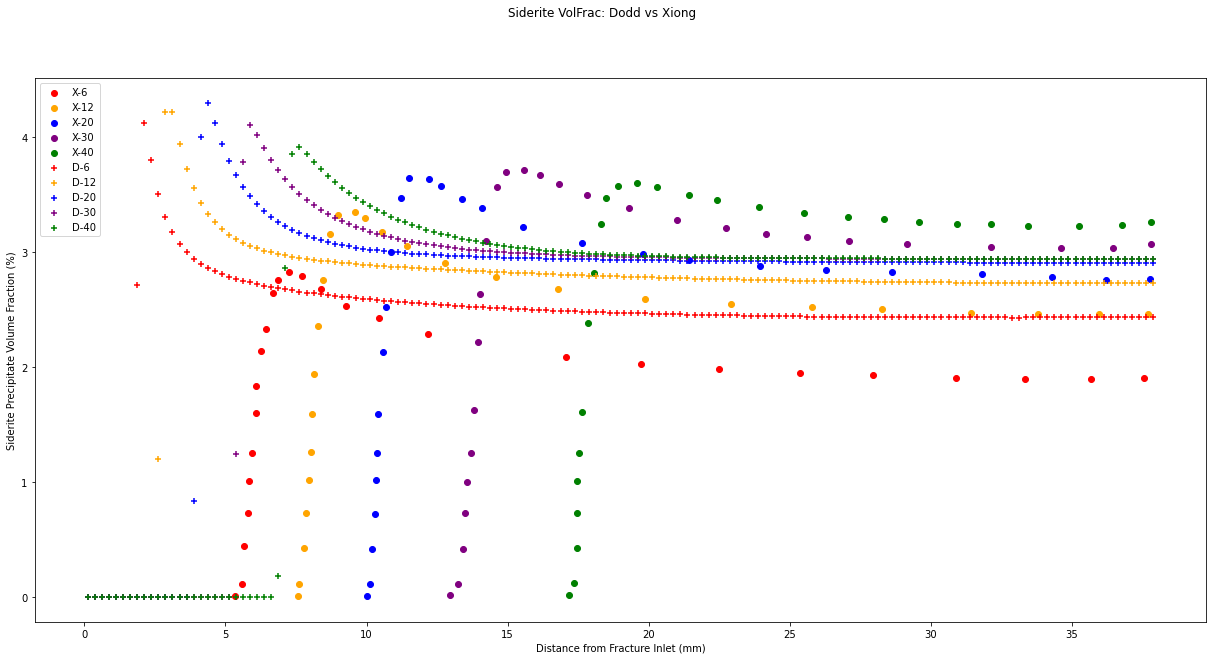

In [21]:
fig, ax1 = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(21)
fig.suptitle("Siderite VolFrac: Dodd vs Xiong")
ax1.scatter(x=x_fb_xiong_6week_DistMm, y=y_fb_xiong_6week_VolFracPct, c="red", label="X-6")
ax1.scatter(x=x_fb_xiong_12week_DistMm, y=y_fb_xiong_12week_VolFracPct, c="orange", label="X-12")
ax1.scatter(x=x_fb_xiong_20week_DistMm, y=y_fb_xiong_20week_VolFracPct, c="blue", label="X-20")
ax1.scatter(x=x_fb_xiong_30week_DistMm, y=y_fb_xiong_30week_VolFracPct, c="purple", label="X-30")
ax1.scatter(x=x_fb_xiong_40week_DistMm, y=y_fb_xiong_40week_VolFracPct, c="green", label="X-40")
ax1.scatter(x=x_fb_dodd_6week_DistMm, y=y_fb_dodd_6week_VolFracPct, c="red", label="D-6", marker="+")
ax1.scatter(x=x_fb_dodd_12week_DistMm, y=y_fb_dodd_12week_VolFracPct, c="orange", label="D-12", marker="+")
ax1.scatter(x=x_fb_dodd_20week_DistMm, y=y_fb_dodd_20week_VolFracPct, c="blue", label="D-20", marker="+")
ax1.scatter(x=x_fb_dodd_30week_DistMm, y=y_fb_dodd_30week_VolFracPct, c="purple", label="D-30", marker="+")
ax1.scatter(x=x_fb_dodd_40week_DistMm, y=y_fb_dodd_40week_VolFracPct, c="green", label="D-40", marker="+")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Siderite Precipitate Volume Fraction (%)")
plt.legend()

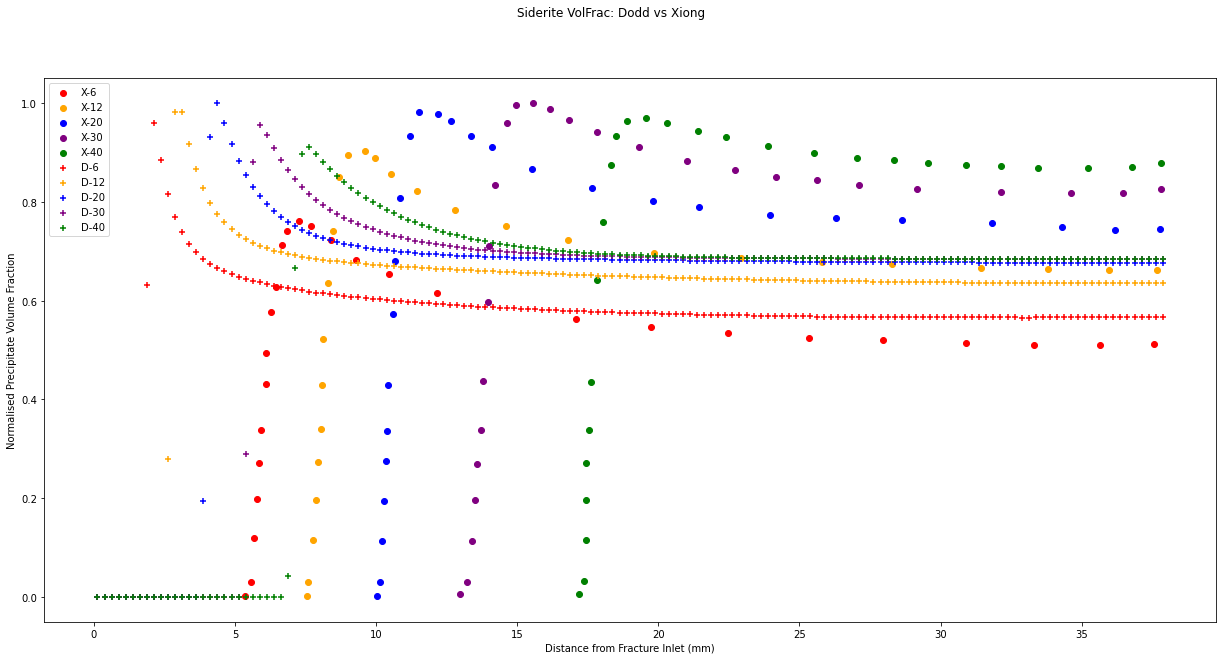

In [22]:
fig, ax1 = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(21)
fig.suptitle("Siderite VolFrac: Dodd vs Xiong")
ax1.scatter(x=x_fb_xiong_6week_DistMm, y=y_fb_xiong_6week_VolFracPct_norm, c="red", label="X-6")
ax1.scatter(x=x_fb_xiong_12week_DistMm, y=y_fb_xiong_12week_VolFracPct_norm, c="orange", label="X-12")
ax1.scatter(x=x_fb_xiong_20week_DistMm, y=y_fb_xiong_20week_VolFracPct_norm, c="blue", label="X-20")
ax1.scatter(x=x_fb_xiong_30week_DistMm, y=y_fb_xiong_30week_VolFracPct_norm, c="purple", label="X-30")
ax1.scatter(x=x_fb_xiong_40week_DistMm, y=y_fb_xiong_40week_VolFracPct_norm, c="green", label="X-40")
ax1.scatter(x=x_fb_dodd_6week_DistMm, y=y_fb_dodd_6week_VolFracPct_norm, c="red", label="D-6", marker="+")
ax1.scatter(x=x_fb_dodd_12week_DistMm, y=y_fb_dodd_12week_VolFracPct_norm, c="orange", label="D-12", marker="+")
ax1.scatter(x=x_fb_dodd_20week_DistMm, y=y_fb_dodd_20week_VolFracPct_norm, c="blue", label="D-20", marker="+")
ax1.scatter(x=x_fb_dodd_30week_DistMm, y=y_fb_dodd_30week_VolFracPct_norm, c="purple", label="D-30", marker="+")
ax1.scatter(x=x_fb_dodd_40week_DistMm, y=y_fb_dodd_40week_VolFracPct_norm, c="green", label="D-40", marker="+")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Normalised Precipitate Volume Fraction")
plt.legend()

# 2.0 - Dodd Model Data - Carbonates

In [23]:
df = df_FB.filter(["X", "timestep", "metric", "Calcite", "Siderite", "Magnesite"])
df = df.dropna(axis=0)
df = df[df["metric"] == "volume"]
df['Carbonates'] = df['Calcite'].astype(float) + df['Siderite'].astype(float) + df['Magnesite'].astype(float)
df

,X,timestep,metric,Calcite,Siderite,Magnesite,Carbonates
0,0.125,0.0001,volume,9.814664e-11,9.986960e-11,9.999998e-11,2.980162e-10
1,0.375,0.0001,volume,9.881493e-11,9.991560e-11,9.999998e-11,2.987305e-10
2,0.625,0.0001,volume,9.914348e-11,9.993581e-11,9.999998e-11,2.990793e-10
3,0.875,0.0001,volume,9.928937e-11,9.994510e-11,9.999998e-11,2.992345e-10
4,1.125,0.0001,volume,9.934643e-11,9.994902e-11,9.999998e-11,2.992954e-10
...,...,...,...,...,...,...,...
147,36.875,280.0,volume,0.000000e+00,2.938397e-02,5.011519e-10,2.938398e-02
148,37.125,280.0,volume,0.000000e+00,2.938382e-02,5.018430e-10,2.938382e-02
149,37.375,280.0,volume,0.000000e+00,2.938268e-02,5.023595e-10,2.938268e-02
150,37.625,280.0,volume,0.000000e+00,2.937957e-02,5.027029e-10,2.937957e-02


In [24]:
def df_interpreter(df, week):
    df = df[df["timestep"] == week]
    x = (df.X).astype(float)
    y = df["Carbonates"].astype(float)
    return x, y

In [25]:
x_fb_dodd_6week_Carb_DistMm, y_fb_dodd_6week_Carb_VolFracDecPct = df_interpreter(df, "42.0")
x_fb_dodd_12week_Carb_DistMm, y_fb_dodd_12week_Carb_VolFracDecPct = df_interpreter(df, "84.0")
x_fb_dodd_20week_Carb_DistMm, y_fb_dodd_20week_Carb_VolFracDecPct = df_interpreter(df, "140.0")
x_fb_dodd_30week_Carb_DistMm, y_fb_dodd_30week_Carb_VolFracDecPct = df_interpreter(df, "210.0")
x_fb_dodd_40week_Carb_DistMm, y_fb_dodd_40week_Carb_VolFracDecPct = df_interpreter(df, "280.0")

In [26]:
y_fb_dodd_6week_Carb_VolFracPct = y_fb_dodd_6week_Carb_VolFracDecPct * 100
y_fb_dodd_12week_Carb_VolFracPct = y_fb_dodd_12week_Carb_VolFracDecPct * 100
y_fb_dodd_20week_Carb_VolFracPct = y_fb_dodd_20week_Carb_VolFracDecPct * 100
y_fb_dodd_30week_Carb_VolFracPct = y_fb_dodd_30week_Carb_VolFracDecPct * 100
y_fb_dodd_40week_Carb_VolFracPct = y_fb_dodd_40week_Carb_VolFracDecPct * 100

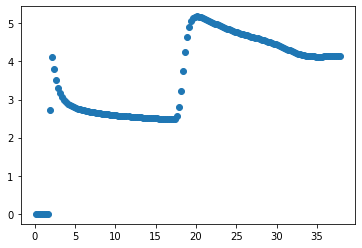

In [27]:
fig, ax1 = plt.subplots(1)
ax1.scatter(x_fb_dodd_6week_Carb_DistMm, y_fb_dodd_6week_Carb_VolFracPct)

In [28]:
def NormalizeData(data, lower, upper):
    return (data - lower) / (upper - lower)

In [29]:
# max_vals = []
# list_of_Xs = [y_fb_dodd_6week_Carb_VolFracPct, y_fb_dodd_12week_Carb_VolFracPct, y_fb_dodd_20week_Carb_VolFracPct, y_fb_dodd_30week_Carb_VolFracPct, y_fb_dodd_40week_Carb_VolFracPct]
# for _ in list_of_Xs:
#     max_vals.append(max(_))
# max_value = max(max_vals)

In [30]:
# y_lower = 0
# y_higher = max_value

y_lower = 0
y_higher = max(y_fb_dodd_40week_Carb_VolFracPct)

# y_fb_dodd_6week_Carb_VolFracPct_norm = NormalizeData(y_fb_dodd_6week_Carb_VolFracPct, y_lower, y_higher)
# y_fb_dodd_12week_Carb_VolFracPct_norm = NormalizeData(y_fb_dodd_12week_Carb_VolFracPct, y_lower, y_higher)
# y_fb_dodd_20week_Carb_VolFracPct_norm = NormalizeData(y_fb_dodd_20week_Carb_VolFracPct, y_lower, y_higher)
# y_fb_dodd_30week_Carb_VolFracPct_norm = NormalizeData(y_fb_dodd_30week_Carb_VolFracPct, y_lower, y_higher)
y_fb_dodd_40week_Carb_VolFracPct_norm = NormalizeData(y_fb_dodd_40week_Carb_VolFracPct, y_lower, y_higher)

# 2.1 - Xiong Experimental Data - Carbonates

In [31]:
fb_xiong_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/crunchflow_work/Xiong_data/FB_40weeks.csv"
fb_xiong_df = pd.read_csv(fb_xiong_path)

In [32]:
def df_interpreter(df, volume_fraction):
    x = df.Dist
    y = df[volume_fraction]
    return x, y

In [33]:
x_xiong_fb_dist_mm, y_xiong_fb_VolFrac = df_interpreter(fb_xiong_df, "Volume_Fraction")
x_xiong_fb_dist_mm_NpArr = np.array(x_xiong_fb_dist_mm)
y_xiong_fb_VolFrac_NpArr = np.array(y_xiong_fb_VolFrac)

In [34]:
def NormalizeData(data, lower, upper):
    return (data - lower) / (upper - lower)

In [35]:
lower = 0
upper = max(y_xiong_fb_VolFrac_NpArr)
y_xiong_fb_VolFrac_norm = NormalizeData(y_xiong_fb_VolFrac_NpArr, lower, upper)

# 2.2 - Dodd Model vs Xiong Experimental - Carbonates

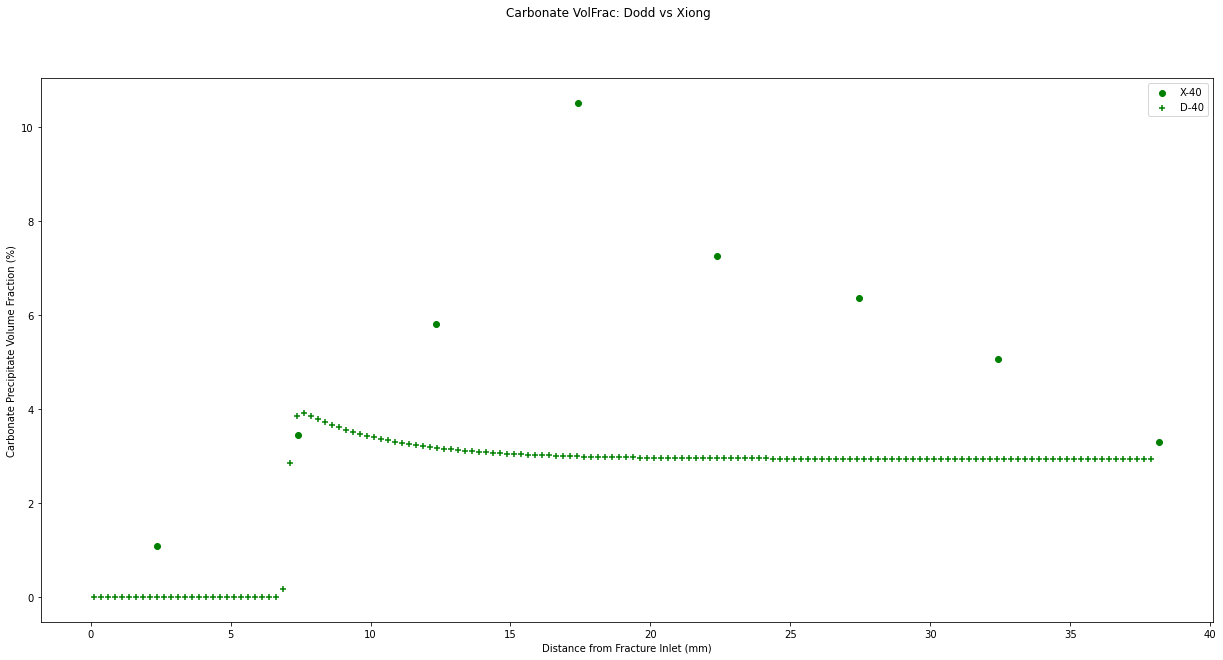

In [36]:
fig, ax1 = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(21)
fig.suptitle("Carbonate VolFrac: Dodd vs Xiong")
ax1.scatter(x=x_xiong_fb_dist_mm_NpArr, y=y_xiong_fb_VolFrac_NpArr, c="green", label="X-40")
# ax1.scatter(x=x_fb_dodd_6week_Carb_DistMm, y=y_fb_dodd_6week_Carb_VolFracPct, c="red", label="D-6", marker="+")
# ax1.scatter(x=x_fb_dodd_12week_Carb_DistMm, y=y_fb_dodd_12week_Carb_VolFracPct, c="orange", label="D-12", marker="+")
# ax1.scatter(x=x_fb_dodd_20week_Carb_DistMm, y=y_fb_dodd_20week_Carb_VolFracPct, c="blue", label="D-20", marker="+")
# ax1.scatter(x=x_fb_dodd_30week_Carb_DistMm, y=y_fb_dodd_30week_Carb_VolFracPct, c="purple", label="D-30", marker="+")
ax1.scatter(x=x_fb_dodd_40week_Carb_DistMm, y=y_fb_dodd_40week_Carb_VolFracPct, c="green", label="D-40", marker="+")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Carbonate Precipitate Volume Fraction (%)")
plt.legend()

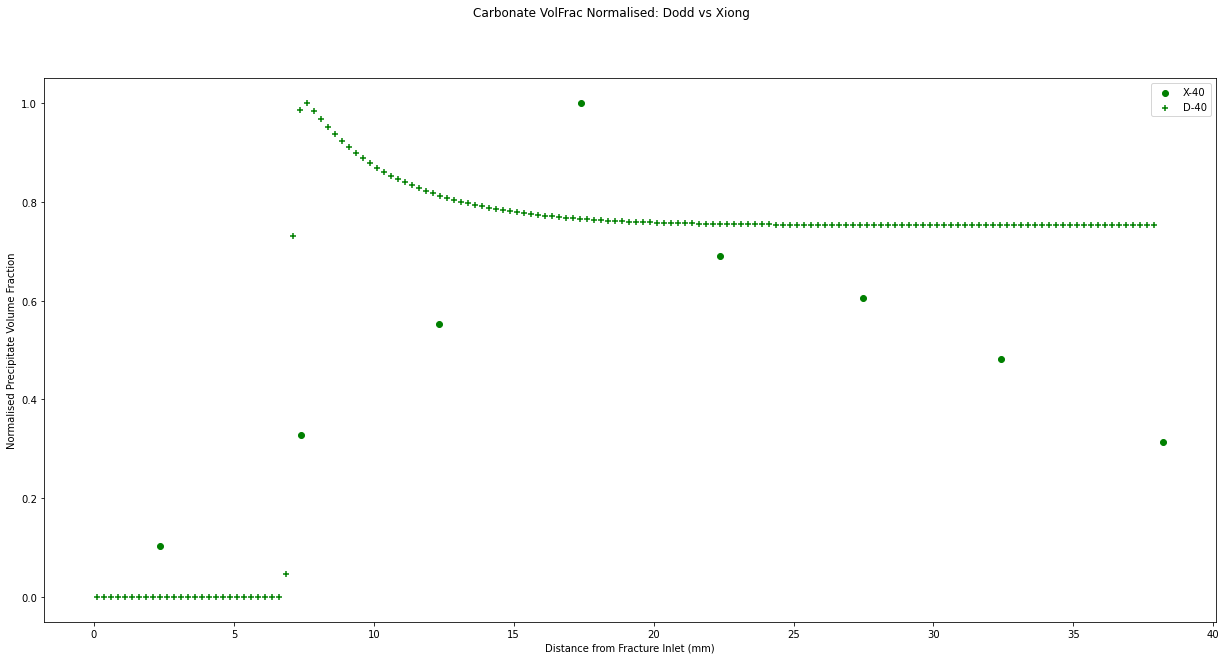

In [37]:
fig, ax1 = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(21)
fig.suptitle("Carbonate VolFrac Normalised: Dodd vs Xiong")
ax1.scatter(x=x_xiong_fb_dist_mm_NpArr, y=y_xiong_fb_VolFrac_norm, c="green", label="X-40")
# ax1.scatter(x=x_fb_dodd_6week_Carb_DistMm, y=y_fb_dodd_6week_Carb_VolFracPct_norm, c="red", label="D-6", marker="+")
# ax1.scatter(x=x_fb_dodd_12week_Carb_DistMm, y=y_fb_dodd_12week_Carb_VolFracPct_norm, c="orange", label="D-12", marker="+")
# ax1.scatter(x=x_fb_dodd_20week_Carb_DistMm, y=y_fb_dodd_20week_Carb_VolFracPct_norm, c="blue", label="D-20", marker="+")
# ax1.scatter(x=x_fb_dodd_30week_Carb_DistMm, y=y_fb_dodd_30week_Carb_VolFracPct_norm, c="purple", label="D-30", marker="+")
ax1.scatter(x=x_fb_dodd_40week_Carb_DistMm, y=y_fb_dodd_40week_Carb_VolFracPct_norm, c="green", label="D-40", marker="+")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Normalised Precipitate Volume Fraction")
plt.legend()

# Carbonates by Mineral

In [38]:
df = df_FB.filter(["X", "timestep", "metric", "Calcite", "Siderite", "Magnesite"])
df = df.dropna(axis=0)
df = df[df["metric"] == "volume"]
df = df[df["timestep"] == "280.0"]
df['Carbonates'] = df['Calcite'].astype(float) + df['Siderite'].astype(float) + df['Magnesite'].astype(float)
df

,X,timestep,metric,Calcite,Siderite,Magnesite,Carbonates
0,0.125,280.0,volume,0.0,0.000000,6.070637e-11,6.070637e-11
1,0.375,280.0,volume,0.0,0.000000,6.160224e-11,6.160224e-11
2,0.625,280.0,volume,0.0,0.000000,6.220332e-11,6.220332e-11
3,0.875,280.0,volume,0.0,0.000000,6.266864e-11,6.266864e-11
4,1.125,280.0,volume,0.0,0.000000,6.306334e-11,6.306334e-11
...,...,...,...,...,...,...,...
147,36.875,280.0,volume,0.0,0.029384,5.011519e-10,2.938398e-02
148,37.125,280.0,volume,0.0,0.029384,5.018430e-10,2.938382e-02
149,37.375,280.0,volume,0.0,0.029383,5.023595e-10,2.938268e-02
150,37.625,280.0,volume,0.0,0.029380,5.027029e-10,2.937957e-02


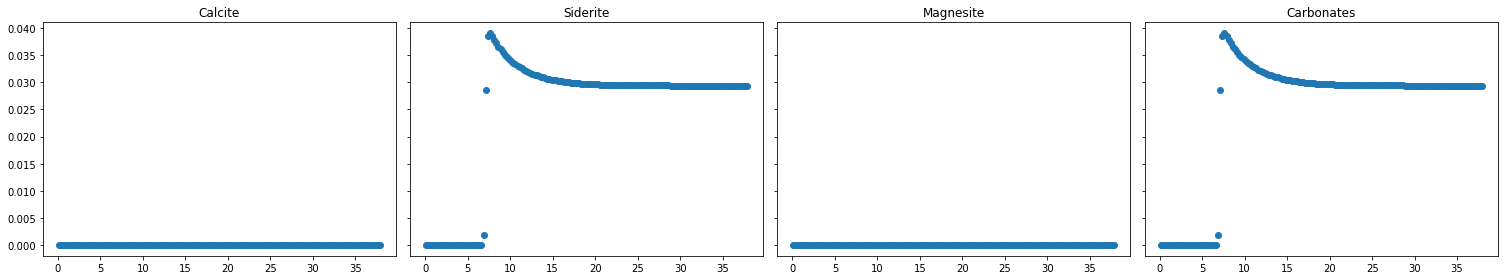

In [39]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharey=True)
fig.set_figheight(4)
fig.set_figwidth(21)
ax1.scatter(df["X"].astype(float), df["Calcite"].astype(float))
ax1.set_title("Calcite")
ax2.scatter(df["X"].astype(float), df["Siderite"].astype(float))
ax2.set_title("Siderite")
ax3.scatter(df["X"].astype(float), df["Magnesite"].astype(float))
ax3.set_title("Magnesite")
ax4.scatter(df["X"].astype(float), df["Carbonates"].astype(float))
ax4.set_title("Carbonates")
plt.tight_layout()